<a href="https://colab.research.google.com/github/feelzoo/SupplyChain_Diversification/blob/main/FactoryDiversification_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supply Chain Diversification Tracker

Trade disruption and the Covid-19 pandemic pushed many manufacturers and retailers to rethink their supply chain resilence. Even though our own factory has allowed us to have many advantages such as operational flexibility and transparency, we aslo need to follow suit for various reasons - risk managment, specialized product offering, innovation opportunity and so on.

Our goal is to reduce our factory's replenshiment production responsibility to 20%. This will enable our factory to focus on delivering goods to new business opportunities quickly and efficiently. This notebook will be used as a visualization tool to track the '20% goal'

## Data and Fuctions

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
path = 'gdrive/My Drive/NADRI/Factory_Breakdown' 
pd.set_option('display.max_columns',None)

Mounted at /content/gdrive


In [14]:
#1. downlaod Relenishment List from NES in a csv file   
#2. downlaod SO Inquiry from NES in a csv file  
rp_factory = pd.read_csv(f'{path}/rp_factory.csv')
so = pd.read_csv(f'{path}/SO_qty.csv',encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6,43,59,61,62,65,67,69,70,72,85,89,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
all = rp_factory[rp_factory['rp_type'] == 'ALLDRP']
all2 = all.groupby('factory')['sku_cd'].count().reset_index()

In [15]:
rp_factory['rp_type'].unique()

array(['ALLDRP', 'DANORI', 'ECOM', 'SAKS', 'TBAY'], dtype=object)

In [39]:
#Creating pie charts for Brand1 and Brand2
def rp_item2(df):
  rp_type = df['rp_type'].unique()[0:2]
  colors = ['#bc5090','#003f5c','#ffa600']
  plt.rcParams['figure.dpi'] = 600
  fig = plt.figure(figsize=(6,2))
  location = 0
  for rp in rp_type:
    plt.subplot(1,2,location+1)
    temp = df[df['rp_type'] == rp]
    temp2 = temp.groupby('factory')['sku_cd'].count().reset_index()
    ax = plt.pie(temp2['sku_cd'],autopct = '%.2f%%',colors= colors,labels=temp2['factory'],wedgeprops = {'linewidth': 1,'edgecolor':'white'},textprops={'fontsize':5})
    plt.title(f'Brand{location+1} by # of developed items',fontsize = 8,fontweight = 'bold')
    temp2= pd.DataFrame(temp2)
    print(temp2)
    plt.axis('equal')
    temp2.to_excel(f'{path}/rp2_item_number_{rp}.xlsx')
    location += 1

  plt.savefig(f'{path}/rp2_item_number.png')
  
  

In [40]:
#Creating pie charts for all of the brands
def rp_item5(df):
  plt.rcParams['figure.dpi'] = 600
  fig = plt.figure(figsize=(6,2))
  rp_type2 = df['rp_type'].unique()
  colors = ['#bc5090','#003f5c','#ffa600']
  location = 0
  for rp in rp_type2:
    plt.subplot(2,3,location+1)
    temp = rp_factory[rp_factory['rp_type'] == rp]
    temp2 = temp.groupby('factory')['sku_cd'].count().reset_index()
    ax = plt.pie(temp2['sku_cd'],autopct = '%.2f%%',colors= colors,labels=temp2['factory'],wedgeprops = {'linewidth': 1,'edgecolor':'white'},textprops={'fontsize':3})
    plt.title(f'Brand {location+1} by # of developed items',fontsize = 4,fontweight = 'bold')
    plt.axis('equal')
    temp2.to_excel(f'{path}/rp5_item_number_{rp}.xlsx')
    location += 1
  plt.savefig(f'{path}/rp5_item_number.png')
  

In [ ]:
def rp_so2(df,so):
  plt.rcParams['figure.dpi'] = 600
  fig = plt.figure(figsize=(6,2))
  rp_type = df['rp_type'].unique()[0:2]
  location = 0
  colors = ['#bc5090','#003f5c','#ffa600']
  styles = []
  for rp in rp_type:
    plt.subplot(1,2,location+1)
    temp = df[df['rp_type'] == rp]
    so_group = so.groupby('sku_cd')['so_qty'].sum().reset_index()
    combined = so_group.merge(temp,on='sku_cd',how='left')
    combined.dropna(subset = ['check_box'],inplace=True)
    combined2=combined.groupby('factory')['so_qty'].sum().reset_index()
    ax = plt.pie(combined2['so_qty'],autopct = '%.2f%%',colors= colors,labels=combined2['factory'],wedgeprops = {'linewidth': 1,'edgecolor':'white'},textprops={'fontsize':5})
    plt.title(f'Brand {location+1} by # of order quantity',fontsize = 8,fontweight = 'bold')
    plt.axis('equal')
    combined2.rename(columns = {'so_qty':f'{rp}_so_qty'})
    print(combined2)
    combined2.to_excel(f'{path}/rp2_so_qty_{rp}.xlsx')
    styles.append(combined)
    location += 1
  plt.savefig(f'{path}/rp2_so_qty.png')
  return styles



In [ ]:
def rp_so5(df,so):
  plt.rcParams['figure.dpi'] = 600
  fig = plt.figure(figsize = (6,2))
  rp_type2 = df['rp_type'].unique()
  location = 0 
  colors = ['#bc5090','#003f5c','#ffa600']
  styles = []
  for rp in rp_type2:
    plt.subplot(2,3,location +1)
    temp = df[df['rp_type'] == rp]
    so_group = so.groupby('sku_cd')['so_qty'].sum().reset_index()
    combined = so_group.merge(temp,on='sku_cd',how='left')
    combined.dropna(subset = ['check_box'],inplace=True)
    combined2=combined.groupby('factory')['so_qty'].sum().reset_index()
    ax = plt.pie(combined2['so_qty'],autopct = '%.2f%%',colors= colors,labels=combined2['factory'],wedgeprops = {'linewidth': 1,'edgecolor':'white'},textprops={'fontsize':3})
    plt.title(f'Brand {location+1} by # of order quantity',fontsize = 5,fontweight = 'bold')
    plt.axis('equal')
    combined2.to_excel(f'{path}/rp5_so_qty_{rp}.xlsx')
    styles.append(combined)
    location +=1
  plt.savefig(f'{path}/rp5_so_qty.png')
  return styles

## Supply Chain Diversification Pie Trackers

   factory  sku_cd
0  GEMOPIA      29
1      RAV     152
2       TF      42
   factory  sku_cd
0  GEMOPIA      26
1      RAV      55
2       TF      34


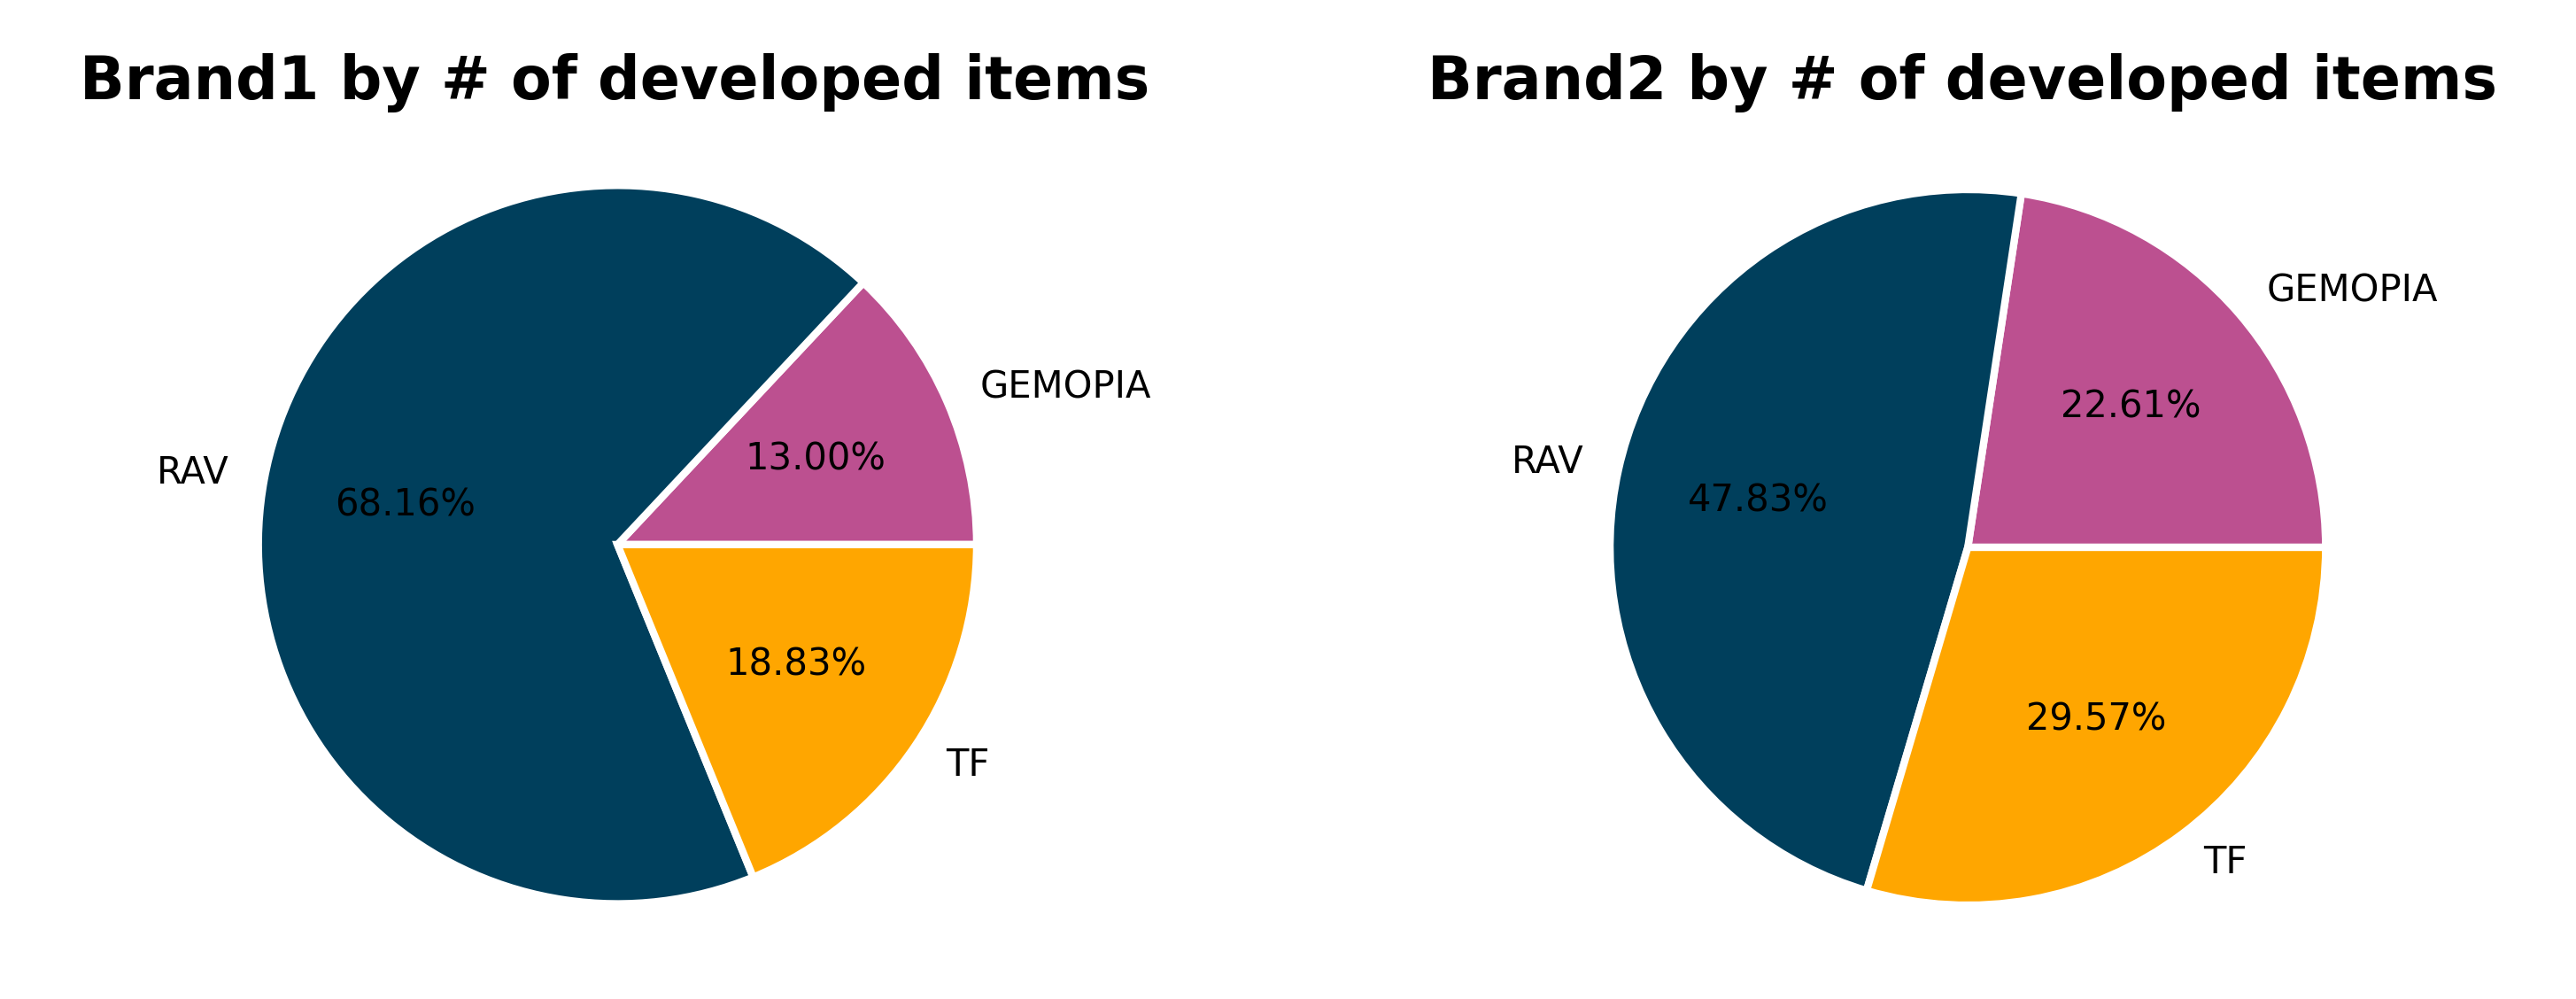

In [44]:
rp_item2(rp_factory)

   factory  so_qty
0  GEMOPIA   38835
1      RAV   60744
2       TF   46541
   factory  so_qty
0  GEMOPIA   54030
1      RAV   25366
2       TF   66768


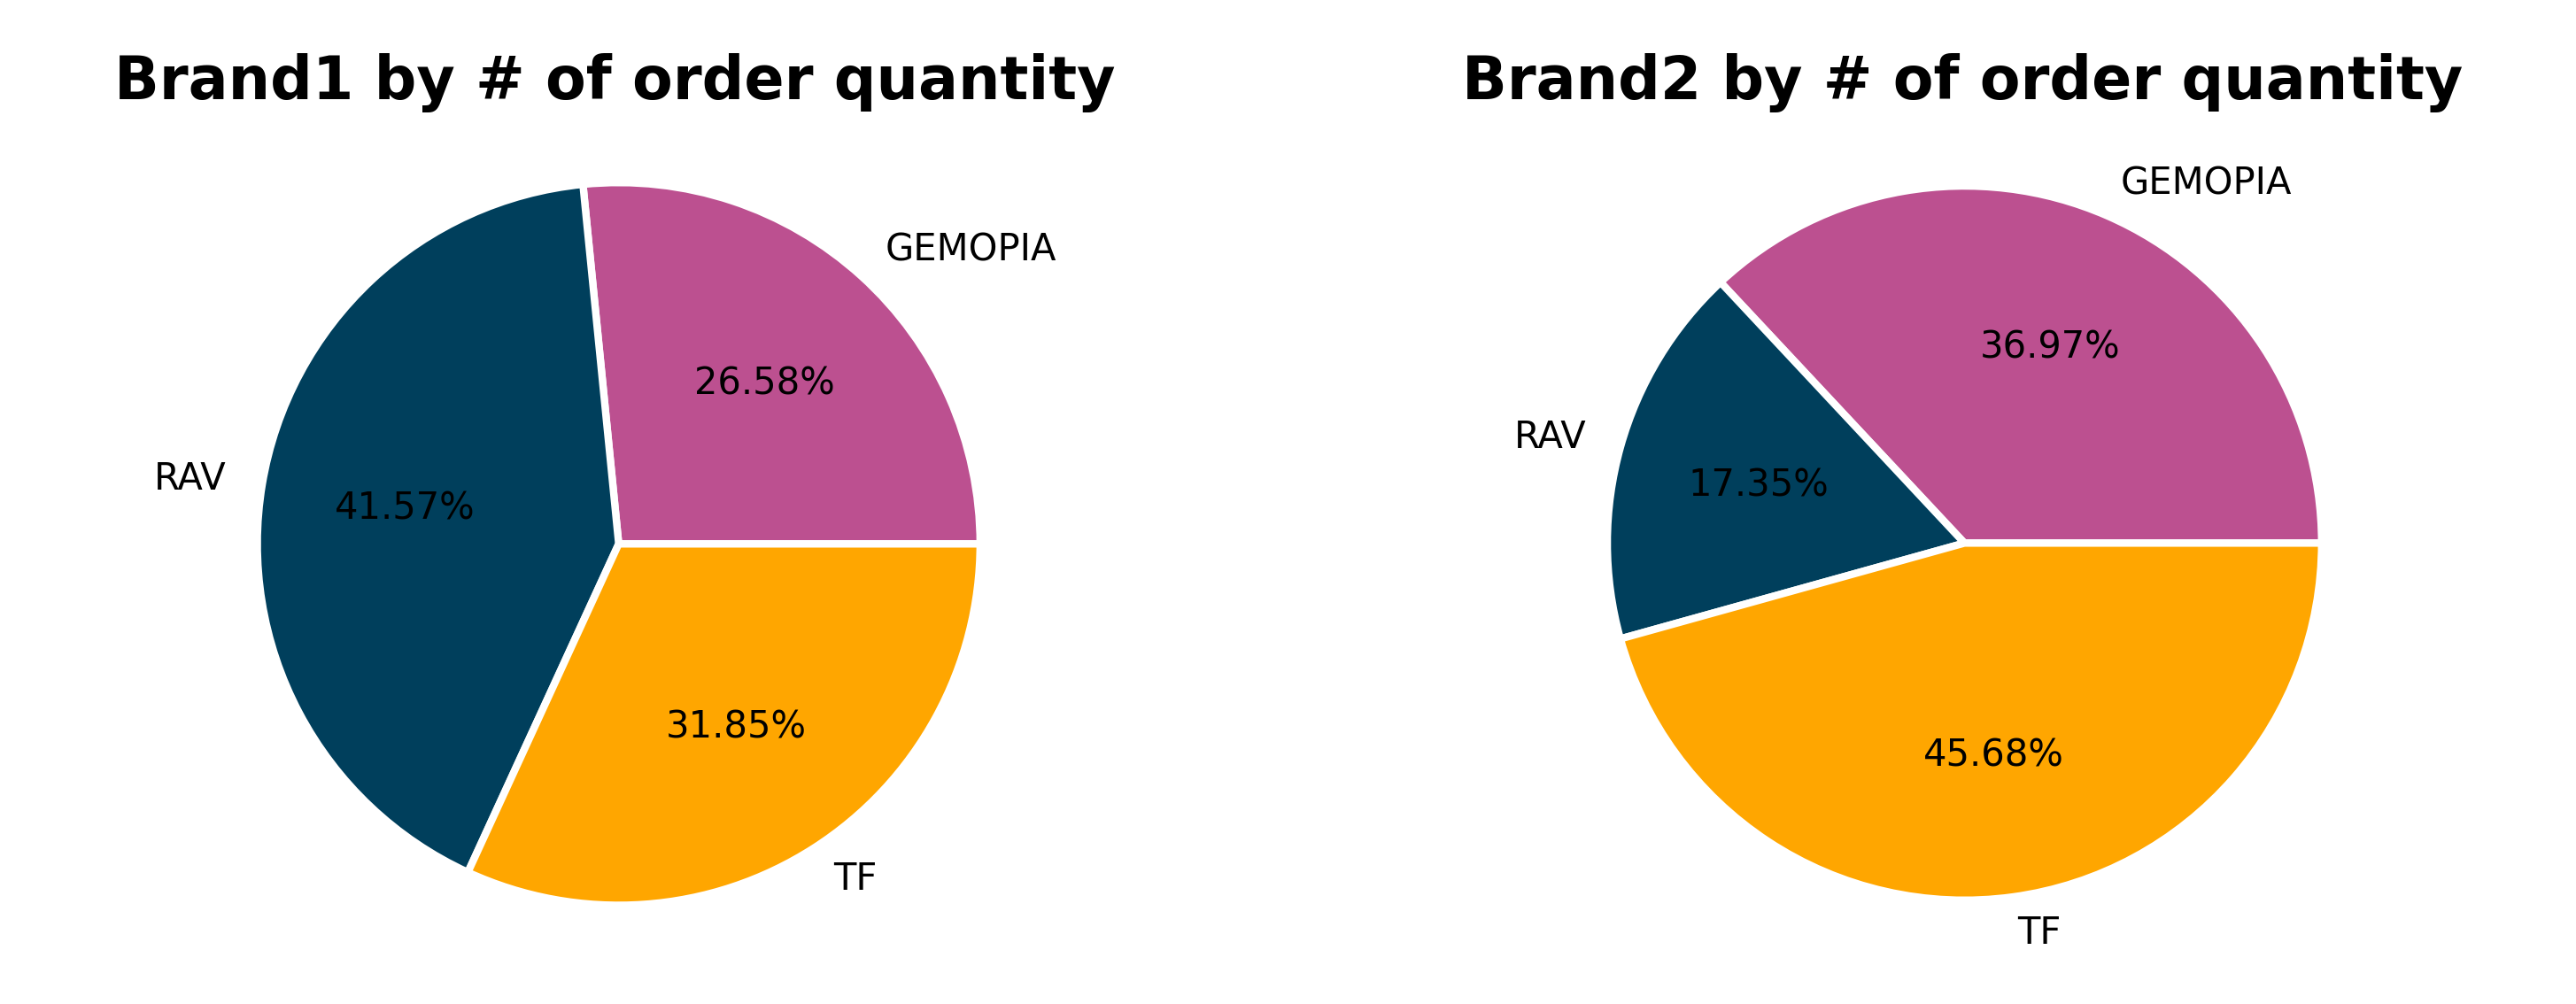

In [24]:
a = rp_so2(rp_factory,so)